In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [4]:
# Data understanding
print("First few rows of the features:")
print(X.head())

print("\nFirst few rows of the target:")
print(y.head())

print("\nData information for features:")
print(X.info())

print("\nData information for target:")
print(y.info())

First few rows of the features:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10 

In [5]:
# Check for NULL values in features
print("\nCheck for NULL values in features:")
print(X.isnull().sum())

# Check for NULL values in target
print("\nCheck for NULL values in target:")
print(y.isnull().sum())


Check for NULL values in features:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

Check for NULL values in target:
Revenue    0
dtype: int64


In [6]:
# Data preprocessing
# Encode categorical variables if necessary
le = LabelEncoder()
if X['Month'].dtype == 'object':
    X.loc[:, 'Month'] = le.fit_transform(X['Month'])
if X['VisitorType'].dtype == 'object':
    X.loc[:, 'VisitorType'] = le.fit_transform(X['VisitorType'])
if X['Weekend'].dtype == 'bool':
    X.loc[:, 'Weekend'] = X['Weekend'].astype(int)
if y.iloc[:, 0].dtype == 'object':  # Convert target to Series
    y = y.iloc[:, 0]
    y = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


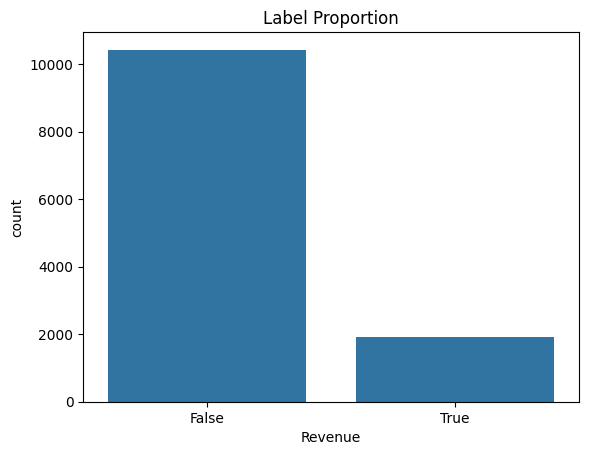


Label counts:
Revenue
False    10422
True      1908
Name: count, dtype: int64


In [7]:
# Convert target to Series if it is a DataFrame
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

# Visualize label proportion
sns.countplot(x=y)
plt.title("Label Proportion")
plt.show()

# Check if data is imbalanced
print("\nLabel counts:")
print(y.value_counts())

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
accuracies = []
f1_scores = []

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model()
    history = model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=0, validation_data=(X_test, y_test), callbacks=[early_stopping])

    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

print("\nK-Fold Cross Validation Accuracy Scores:", accuracies)
print("Mean Accuracy:", np.mean(accuracies))
print("\nK-Fold Cross Validation F1 Scores:", f1_scores)
print("Mean F1 Score:", np.mean(f1_scores))


39/39 [==============================] - 0s 1ms/step

K-Fold Cross Validation Accuracy Scores: [0.8824006488240065, 0.8905109489051095, 0.9067315490673155, 0.8986212489862125, 0.9018653690186537, 0.9083536090835361, 0.9067315490673155, 0.884022708840227, 0.9051094890510949, 0.8953771289537713]
Mean Accuracy: 0.8979724249797243

K-Fold Cross Validation F1 Scores: [0.586894586894587, 0.6380697050938338, 0.6179401993355481, 0.6290801186943621, 0.634441087613293, 0.6646884272997033, 0.6546546546546547, 0.6166219839142092, 0.6811989100817438, 0.5981308411214953]
Mean F1 Score: 0.632172051470343


Epoch 1/30
987/987 [==============================] - 4s 3ms/step - loss: 0.3588 - accuracy: 0.8434 - val_loss: 0.3020 - val_accuracy: 0.8755
Epoch 2/30
987/987 [==============================] - 3s 3ms/step - loss: 0.2704 - accuracy: 0.8942 - val_loss: 0.2841 - val_accuracy: 0.8804
Epoch 3/30
987/987 [==============================] - 3s 3ms/step - loss: 0.2606 - accuracy: 0.8958 - val_loss: 0.2822 - val_accuracy: 0.8804
Epoch 4/30
987/987 [==============================] - 3s 3ms/step - loss: 0.2543 - accuracy: 0.8990 - val_loss: 0.2751 - val_accuracy: 0.8824
Epoch 5/30
987/987 [==============================] - 3s 3ms/step - loss: 0.2499 - accuracy: 0.8989 - val_loss: 0.2784 - val_accuracy: 0.8775
Epoch 6/30
987/987 [==============================] - 3s 3ms/step - loss: 0.2470 - accuracy: 0.8994 - val_loss: 0.2725 - val_accuracy: 0.8824
Epoch 7/30
987/987 [==============================] - 3s 3ms/step - loss: 0.2461 - accuracy: 0.8992 - val_loss: 0.2699 - val_accuracy: 0.8840
Epoch 

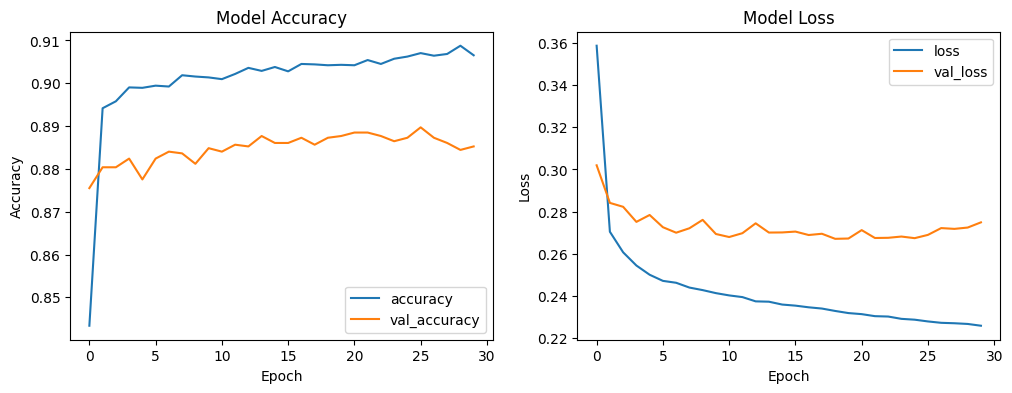

In [12]:
# Train and evaluate model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = create_model()
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test, y_test))

# Model summary
print("\nModel Summary:")
model.summary()

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')

plt.show()


78/78 [==============================] - 0s 1ms/step

Confusion Matrix:
[[1957   98]
 [ 185  226]]


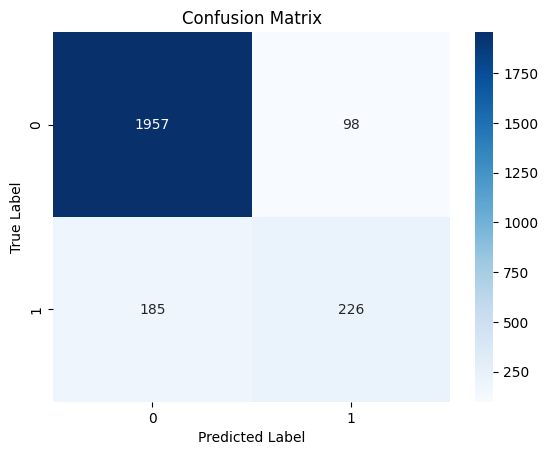

In [13]:
# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [14]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy and F1 Score table
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame({
    'Model': ['Neural Network'],
    'Accuracy': [accuracy],
    'F1 Score': [f1]
})

print("\nAccuracy and F1 Score table:")
print(results)


Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.95      0.93      2055
        True       0.70      0.55      0.61       411

    accuracy                           0.89      2466
   macro avg       0.81      0.75      0.77      2466
weighted avg       0.88      0.89      0.88      2466


Accuracy and F1 Score table:
            Model  Accuracy  F1 Score
0  Neural Network  0.885239  0.614966
